In [7]:
import tensorflow as tf
import numpy as np
from util import ImShow as I
import matplotlib.pyplot as plt

In [2]:
def batches(l, n):
    """Yield successive n-sized batches from l, the last batch is the left indexes."""
    for i in xrange(0, l, n):
        yield range(i,min(l,i+n))
def draw_batch(l,n):
    """return n-sized batch index from l with replacement"""
    return np.random.choice(l, size=n)
class Fluent_Autoencoder(object):
    def __init__(self, sess, input_dim_list=[784,400]):
        """input_dim_list must include the original data dimension"""
        assert len(input_dim_list) >= 2
        self.W_list = []
        self.encoding_b_list = []
        self.decoding_b_list = []
        self.dim_list = input_dim_list
        ## Encoders parameters
        for i in range(len(input_dim_list)-1):
            init_max_value = np.sqrt(6. / (self.dim_list[i] + self.dim_list[i+1]))
            self.W_list.append(tf.Variable(tf.random_uniform([self.dim_list[i],self.dim_list[i+1]],
                                                             np.negative(init_max_value),init_max_value)))
            self.encoding_b_list.append(tf.Variable(tf.random_uniform([self.dim_list[i+1]],-0.1,0.1)))
        ## Decoders parameters
        for i in range(len(input_dim_list)-2,-1,-1):
            self.decoding_b_list.append(tf.Variable(tf.random_uniform([self.dim_list[i]],-0.1,0.1)))
        ## Placeholder for input
        self.input_x = tf.placeholder(tf.float32,[None,self.dim_list[0]])
        self.input_y = tf.placeholder(tf.float32,[None,self.dim_list[0]])
        ## coding graph :
        last_layer = self.input_x
        for weight,bias in zip(self.W_list,self.encoding_b_list):
            hidden = tf.sigmoid(tf.matmul(last_layer,weight) + bias)
            last_layer = hidden
        self.hidden = hidden 
        ## decode graph:
        for weight,bias in zip(reversed(self.W_list),self.decoding_b_list):
            hidden = tf.sigmoid(tf.matmul(last_layer,tf.transpose(weight)) + bias)
            last_layer = hidden
        self.recon = last_layer
   
        self.cost = tf.reduce_mean(tf.square(self.input_x - self.recon))
        #self.cost = tf.losses.log_loss(self.recon, self.input_x)
        self.train_step = tf.train.AdamOptimizer().minimize(self.cost)
        sess.run(tf.global_variables_initializer())

    def fit(self, X, sess, learning_rate=0.15,
            iteration=200, batch_size=50, init=False,verbose=False):
        assert X.shape[1] == self.dim_list[0]
        if init:
            sess.run(tf.global_variables_initializer())
        sample_size = X.shape[0]
        for i in xrange(iteration):
            for one_batch in batches(sample_size, batch_size):
                random_batch = draw_batch(sample_size, batch_size)
                sess.run(self.train_step,feed_dict = {self.input_x:X[one_batch],self.input_y:X[random_batch]})

            if verbose and i%20==0:
                e = self.cost.eval(session = sess,feed_dict = {self.input_x: X[one_batch]})
                print "    iteration : ", i ,", cost : ", e

    def transform(self, X, sess):
        return self.hidden.eval(session = sess, feed_dict={self.input_x: X})

    def getRecon(self, X, sess):
        return self.recon.eval(session = sess,feed_dict={self.input_x: X})
def test():
    start_time = time.time()
    with tf.Session() as sess:
        ae = Deep_Autoencoder(sess = sess, input_dim_list=[784,625,400,225,100])
        error = ae.fit(x[:1000] ,sess = sess, learning_rate=0.01, batch_size = 500, iteration = 1000, verbose=False)

    print "size 1000 Runing time:" + str(time.time() - start_time) + " s"

    start_time = time.time()
    with tf.Session() as sess:
        ae = Deep_Autoencoder(sess = sess, input_dim_list=[784,625,400,225,100])
        error = ae.fit(x[:10000] ,sess = sess, learning_rate=0.01, batch_size = 500, iteration = 1000, verbose=False)

    print "size 10,000 Runing time:" + str(time.time() - start_time) + " s"

    start_time = time.time()
    with tf.Session() as sess:
        ae = Deep_Autoencoder(sess = sess, input_dim_list=[784,625,400,225,100])
        error = ae.fit(x[:20000] ,sess = sess, learning_rate=0.01, batch_size = 500, iteration = 1000, verbose=False)

    print "size 20,000 Runing time:" + str(time.time() - start_time) + " s"

    start_time = time.time()
    with tf.Session() as sess:
        ae = Deep_Autoencoder(sess = sess, input_dim_list=[784,625,400,225,100])
        error = ae.fit(x[:50000] ,sess = sess, learning_rate=0.01, batch_size = 500, iteration = 1000, verbose=False)

    print "size 50,000 Runing time:" + str(time.time() - start_time) + " s"


In [9]:
import time
x = np.load(r"./data/4_other_x.npk")
start_time = time.time()
with tf.Session() as sess:
    ae = Fluent_Autoencoder(sess = sess, input_dim_list=[784,400,200])
    error = ae.fit(x ,sess = sess, learning_rate=0.01, batch_size = 500, iteration = 300, verbose=True)
    R = ae.getRecon(x, sess = sess)
    
    error = ae.fit(R ,sess = sess, learning_rate=0.01, batch_size = 500, iteration = 300, verbose=True)
    R1 = ae.getRecon(x, sess = sess)
    print "Runing time:" + str(time.time() - start_time) + " s"

    iteration :  0 , cost :  0.05864
    iteration :  20 , cost :  0.0415039
    iteration :  40 , cost :  0.0285514
    iteration :  60 , cost :  0.0203785
    iteration :  80 , cost :  0.0177226
    iteration :  100 , cost :  0.0152742
    iteration :  120 , cost :  0.0135352
    iteration :  140 , cost :  0.0116601
    iteration :  160 , cost :  0.00986324
    iteration :  180 , cost :  0.00853813
    iteration :  200 , cost :  0.00754082
    iteration :  220 , cost :  0.00670906
    iteration :  240 , cost :  0.00598002
    iteration :  260 , cost :  0.00533955
    iteration :  280 , cost :  0.0047929
    iteration :  0 , cost :  0.000329632
    iteration :  20 , cost :  0.000220342
    iteration :  40 , cost :  0.000186809
    iteration :  60 , cost :  0.000165522
    iteration :  80 , cost :  0.000149463
    iteration :  100 , cost :  0.000136792
    iteration :  120 , cost :  0.000126415
    iteration :  140 , cost :  0.000117614
    iteration :  160 , cost :  0.000110028
    it

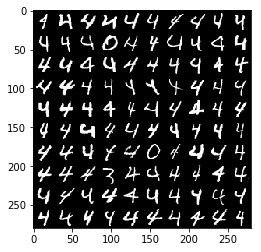

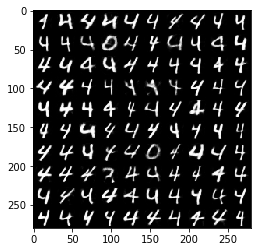

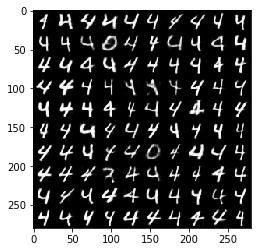

In [10]:
Xpic = I.tile_raster_images(X = x, img_shape=(28,28), tile_shape=(10,10))
plt.imshow(Xpic,cmap='gray')
plt.show()
Rpic = I.tile_raster_images(X = R, img_shape=(28,28), tile_shape=(10,10))
plt.imshow(Rpic,cmap='gray')
plt.show()
R1pic = I.tile_raster_images(X = R1, img_shape=(28,28), tile_shape=(10,10))
plt.imshow(R1pic,cmap='gray')
plt.show()